<a href="https://colab.research.google.com/github/phrenico/control-notebooks/blob/main/3_8_drug_administration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug administration (exercise 3.8) from Feedback systems book



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

%matplotlib inline

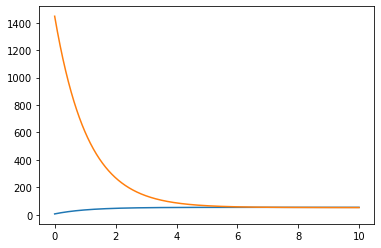

In [6]:
def f(x, t):
  V_b = 48
  V_l = 0.6
  q = 1.5
  q_max = 2.75
  c_0 = 0.1
  q_iv = 0  # (40 / 46.07) * 1000  # converted g to mmol
  q_gi = 0  # (12 / 46.07) * 1000  # converted g to mmol 

  c_b, c_l = x

  dc_b = (q * (c_l - c_b) + q_iv) / V_b
  dc_l = (q * (c_b - c_l) - q_max * (c_l / (c_0 + c_l)) + q_gi) * V_l
  return dc_b, dc_l


def convert2konc(m, V, molarmass=46.07):
  c = m / molarmass * 1e3 / V
  return c

t = np.arange(0, 10, 0.01)
x0 = [convert2konc(12, 48), convert2konc(40, 0.6)]

x = odeint(f, x0, t)

plt.figure()
plt.plot(t, x)